# Linear SVM modeling

##### Import libraries and data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# import data
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")

train.drop(["fbs_1", "cp_3", "restecg_2", "thal_1", "ca_4"], axis=1, inplace=True)
val.drop(["fbs_1", "cp_3", "restecg_2", "thal_1", "ca_4"], axis=1, inplace=True)

train.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,restecg_1,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,60,0,102,318,160,0.0,1,0,1,1,0,0,1,1,0,0,1,0
1,59,1,140,221,164,0.0,1,1,0,1,1,0,1,0,0,0,1,0
2,58,0,170,225,146,2.8,0,0,0,0,1,1,0,0,1,0,0,0
3,64,0,130,303,122,2.0,1,0,0,1,0,1,0,0,1,0,1,0
4,37,1,130,250,187,3.5,1,0,1,1,0,0,0,0,0,0,1,0


# 1. Split X and y

In [2]:
# split X and y variables
X = train.drop("target", axis=1)
y = train.target
cols = X.columns

X_val = val.drop("target", axis=1)
y_val = val.target

# 2. Scaling

In [3]:
# scale data with standard scaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_val = sc.transform(X_val)

X = pd.DataFrame(X, columns=cols)
X_val = pd.DataFrame(X_val, columns=cols)

# 3. Hyperparameter tuning

In [4]:
# create a parameter grid and conduct a grid search
params = {
    "C":[0.1, 0.05, 1, 5, 10],
    "tol":[0.000001, 0.00001, 0.0001, 0.001],
    "max_iter":[1000, 2000, 5000]
}

gs = GridSearchCV(LinearSVC(), param_grid=params, cv=5)
gs.fit(X, y)

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.05, 1, 5, 10],
                         'max_iter': [1000, 2000, 5000],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [5]:
# display best params
gs.best_params_

{'C': 0.05, 'max_iter': 1000, 'tol': 1e-06}

In [6]:
# save the model
model1 = gs.best_estimator_

# Performance Metrics

In [7]:
# find performance metrics for train and validation set
model1.fit(X, y)
train_pred = model1.predict(X)
y_pred = model1.predict(X_val)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       120
           1       0.85      0.89      0.87       124

    accuracy                           0.86       244
   macro avg       0.87      0.86      0.86       244
weighted avg       0.87      0.86      0.86       244


 validation scores
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.74      0.85        19

    accuracy                           0.82        28
   macro avg       0.82      0.87      0.82        28
weighted avg       0.89      0.82      0.83        28



## Feature importances

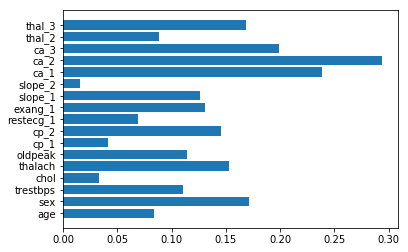

In [8]:
# find most important features
plt.barh(X.columns, abs(model1.coef_[0]))
plt.show()

## Remodel with only most important features

In [9]:
# recreate data with only the most important feature
X_t = X.drop(["slope_1", "cp_1", "chol"], axis=1)
X_val_t = X_val.drop(["slope_1", "cp_1", "chol"], axis=1)

## Hyper parameter tuning

In [10]:
# create a parameter grid and conduct grid search
params = {
    "C":[0.1, 0.05, 1, 5, 10],
    "tol":[0.000001, 0.00001, 0.0001, 0.001],
    "max_iter":[500, 1000, 2000, 5000]
}

gs = GridSearchCV(LinearSVC(), param_grid=params, cv=5)
gs.fit(X_t, y)

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.05, 1, 5, 10],
                         'max_iter': [500, 1000, 2000, 5000],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
# display best parameters
gs.best_params_

{'C': 0.1, 'max_iter': 500, 'tol': 1e-06}

In [12]:
# save the model
model2 = gs.best_estimator_

# Performance Metrics

In [13]:
# find the performance metrics for the second model
model2.fit(X_t, y)
train_pred = model2.predict(X_t)
y_pred = model2.predict(X_val_t)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       120
           1       0.85      0.90      0.87       124

    accuracy                           0.87       244
   macro avg       0.87      0.87      0.87       244
weighted avg       0.87      0.87      0.87       244


 validation scores
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.74      0.85        19

    accuracy                           0.82        28
   macro avg       0.82      0.87      0.82        28
weighted avg       0.89      0.82      0.83        28

